BL3RightThird
============

This was a model including the 4-jaw slit, collimators c1 and C2 and then detectors at the 8m position of the neutron detector. For this model, the y jaws of the slit were set fully open but the x jaws were set at +1 cm and +3 cm leaving a 2 cm openning. Because of the focussing effect of the collimator system, the resulting beam spot is displaced to the positive x side.

At the detector position are a position sensitive detector (psd), a full-coverage wavelength monitor (LMon), and a grid of 9 wavelength monitors with the central row and column being 1 cm wide/tall and the outer blocks 5 cm wide to ensure that they catch all the neutrons in their segment of the detector space.

We start by loading tools and reading in the output of the position sensitive detector.

In [1]:
import sys
sys.path.insert(0, '/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nspectrum import NSpectrum
from psd import PSDData

Load psd file BL3RightThird/Blackbox.psd
Read 336 lines from BL3RightThird/Blackbox.psd
Line 30 # Data [psd_monitor/Blackbox.psd] I:

Intensity block starts at line 31
Line 31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Found 101 columns.
End of first block.
Line 131 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Line 132 # Errors [psd_monitor/Blackbox.psd] I_err:

error block starts at line 31
Found 101 rows.
<class 'numpy.ndarray'>
(2, 2)


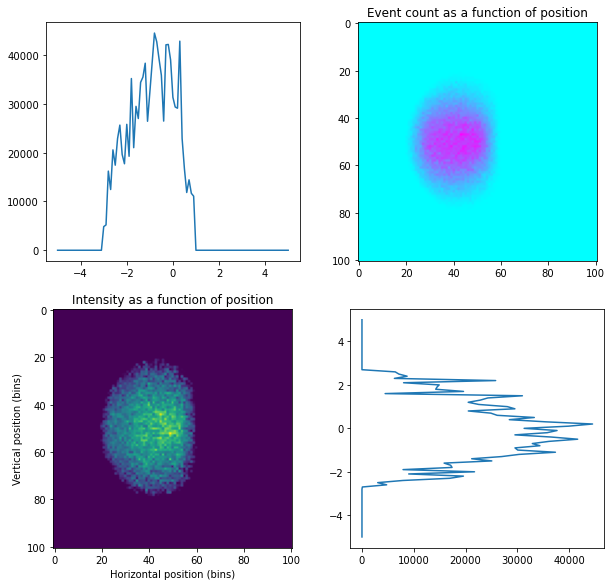

In [3]:
im1 = PSDData('BL3RightThird/Blackbox.psd')
im1.plot()

This time the counts are rather nicely centered.

Next let's look at the overall spectrum.

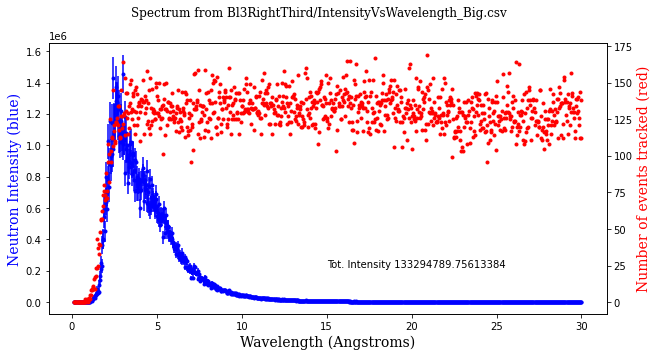

In [4]:
full = NSpectrum('Bl3RightThird/IntensityVsWavelength_Big.csv')
full.plot()

In [5]:
fullC1, fullEC = full.C1()
print(f'Full C1 = {fullC1}+-{fullEC} s')

Full C1 = 5.006112991667975+-0.00034444501763742995 s


That is lower than the C1 for the full beam.

Now we have to read in the 9 individual monitors.

In [6]:
mon = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(3):
    for j in range(3):
        print(f'Load LMon{i}{j}csv.dat')
        mon[i][j] = NSpectrum(f'Bl3RightThird/LMon{i}{j}csv.dat')

Load LMon00csv.dat
Load LMon01csv.dat
Load LMon02csv.dat
Load LMon10csv.dat
Load LMon11csv.dat
Load LMon12csv.dat
Load LMon20csv.dat
Load LMon21csv.dat
Load LMon22csv.dat


Now we would like to see what they look like.

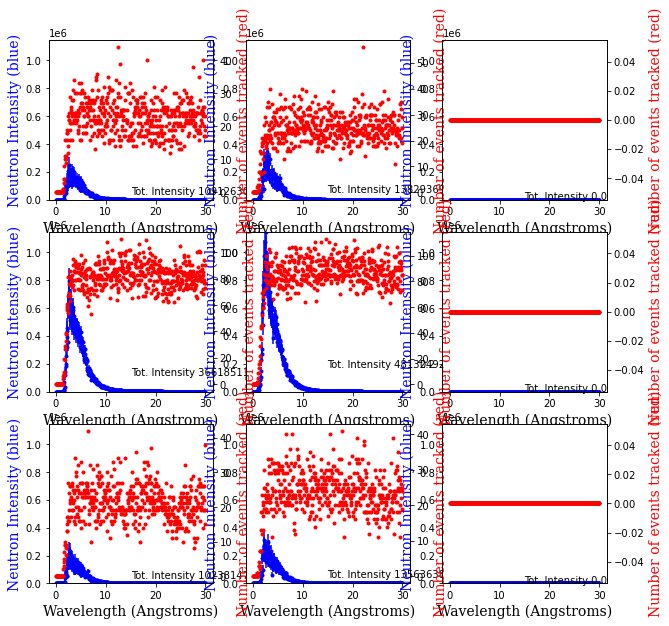

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
max = mon[1][1].max_inten
for i in range(3):
    for j in range(3):
        mon[i][j].plotOn(axes[i][j])
        axes[i][j].set_ylim(bottom=0.0, top=max)
# plt.tight_layout()

Well, it is a trifle messy (overly large font size for labels in part) but it gets the point across. This time we have no counts in the right 1/3 of the detection area and that the central 1/3 row is about 3x as strong as the upper and lower 2/3 (remember that the central 1/3 either way is 2 cm tall but the outer thirds are 5 cm tall or wide). The central spot has arround 100 neutrons per channel while the corners have about 1/5 of that. Here the lowest intensity is about 1 million, which is usable for the purpose of calculating C1 but getting a bit iffy.

So what do the C1s look like?

In [8]:
c = np.zeros((3, 3))
e = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        c[i][j], e[i][j] = mon[i][j].C1()
    print(f'{c[i][0]:.4f}+/-{e[i][0]:.4f}     {c[i][1]:.4f}+/-{e[i][1]:.4f}     {c[i][2]:.4f}+/-{e[i][2]:.4f} s')

5.1209+/-0.0011     4.9010+/-0.0010     nan+/-nan s
5.1642+/-0.0007     4.8794+/-0.0006     nan+/-nan s
5.1218+/-0.0013     4.9081+/-0.0011     nan+/-nan s


/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools/spectralcorrection.py:66: RuntimeWarning: invalid value encountered in double_scalars
  C1 = num / denom


So the differences are very real, many times the uncertainty. What if we re-do them as differences from the overall value?

In [9]:
for i in range(3):
    print(f'{c[i][0]-fullC1:.4f}+/-{e[i][0]:.4f}     {c[i][1]-fullC1:.4f}+/-{e[i][1]:.4f}     {c[i][2]-fullC1:.4f}+/-{e[i][2]:.4f} s')

0.1148+/-0.0011     -0.1051+/-0.0010     nan+/-nan s
0.1581+/-0.0007     -0.1267+/-0.0006     nan+/-nan s
0.1157+/-0.0013     -0.0980+/-0.0011     nan+/-nan s


This one is the most problematic with most of the differences above the 0.1 s level.

We can do them in horizontal stripes too.

In [10]:
tl = NSpectrum(clone=mon[0][0])
tm = NSpectrum(clone=mon[0][1])
tr = NSpectrum(clone=mon[0][2])
top = tl.plus(tm.plus(tr))

In [11]:
tlc, tle = tl.C1()
print(f'{tlc:.4f}+/-{tle:.4f}')
tmc, tme = tm.C1()
print(f'{tmc:.4f}+/-{tme:.4f}')
trc, tre = tr.C1()
print(f'{trc:.4f}+/-{tre:.4f}')
tc, te = top.C1()
print(f'{tc:.4f}+/-{te:.4f}')
print(f'Top row Raw C1 = {top._corr.CorrBC(top.data[:, 0], top.data[:, 1])}')

5.1209+/-0.0014
4.9010+/-0.0012
nan+/-nan
5.0015+/-0.0009
Top row Raw C1 = 5.001491537440236


In [12]:
ml = NSpectrum(clone=mon[1][0])
mm = NSpectrum(clone=mon[1][1])
mr = NSpectrum(clone=mon[1][2])
mmid = ml.plus(mm.plus(mr))
print(f'Middle row raw C1 = {mmid._corr.CorrBC(mmid.data[:, 0], mmid.data[:, 1])}')
mlc, mle = ml.C1()
print(f'{mlc:.4f}+/-{mle:.4f}')
mmc, mme = mm.C1()
print(f'{mmc:.4f}+/-{mme:.4f}')
mrc, mre = mr.C1()
print(f'{mrc:.4f}+/-{mre:.4f}')
mc, me = mmid.C1()
print(f'{mc:.4f}+/-{me:.4f}')

Middle row raw C1 = 5.008171363363953
5.1642+/-0.0007
4.8793+/-0.0006
nan+/-nan
5.0083+/-0.0004


In [13]:
bl = NSpectrum(clone=mon[2][0])
bm = NSpectrum(clone=mon[2][1])
br = NSpectrum(clone=mon[2][2])
bot = bl.plus(bm.plus(br))
print(f'Bottome row raw C1 = {bot._corr.CorrBC(bot.data[:, 0], bot.data[:, 1])}')
bc, be = bot.C1()
print(f'{bc:.4f}+/-{be:.4f}')

Bottome row raw C1 = 5.003268783124721
5.0031+/-0.0010


So again, we have small differences between the three values suggesting that we can count only the central 2 cm without serious effect on the C1 value.